In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("data.csv")
df.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
2260,Toyota,Camry,2017,regular unleaded,268.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,30,21,2031,31370
4299,Infiniti,EX,2011,premium unleaded (recommended),297.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Luxury",Midsize,4dr SUV,24,17,190,36600
1859,Volkswagen,Beetle Convertible,2015,regular unleaded,170.0,4.0,AUTOMATIC,front wheel drive,2.0,NaN,Compact,Convertible,32,24,873,27995
2924,Toyota,Corolla,2015,regular unleaded,140.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Sedan,42,30,2031,18965
11044,Toyota,Tundra,2017,regular unleaded,381.0,8.0,AUTOMATIC,rear wheel drive,4.0,NaN,Large,Extended Cab Pickup,18,13,2031,33430


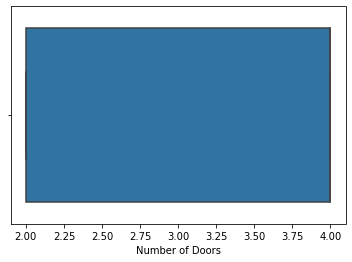

In [2]:
# No outliers
sns.boxplot(x=df['Number of Doors'])

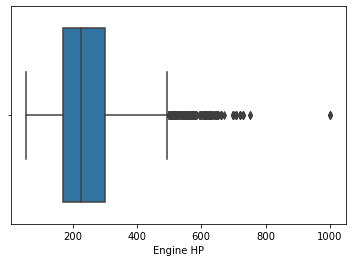

In [4]:
# Outliers
sns.boxplot(x=df['Engine HP'])

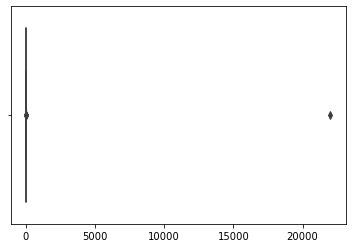

In [51]:
s = [1,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,5,5,5,5,7,18,22000]
sns.boxplot(x=s)

In [23]:
df["Engine HP"].quantile(0.25)

170.0

In [21]:
df["Engine HP"].quantile(0.75)

300.0

In [13]:
df["Popularity"].max()

5657

In [14]:
df["Popularity"].quantile(1)

5657.0

In [15]:
df["Popularity"].min()

2

In [16]:
df["Popularity"].quantile(0)

2.0

In [19]:
df["Popularity"].quantile(0.75)

2009.0

In [6]:
df.quantile(0.25)

Year                 2007.0
Engine HP             170.0
Engine Cylinders        4.0
Number of Doors         2.0
highway MPG            22.0
city mpg               16.0
Popularity            549.0
MSRP                21000.0
Name: 0.25, dtype: float64

In [7]:
df.quantile(0.75)

Year                 2016.00
Engine HP             300.00
Engine Cylinders        6.00
Number of Doors         4.00
highway MPG            30.00
city mpg               22.00
Popularity           2009.00
MSRP                42231.25
Name: 0.75, dtype: float64

In [5]:
# Hard technique

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

Year                    9.00
Engine HP             130.00
Engine Cylinders        2.00
Number of Doors         2.00
highway MPG             8.00
city mpg                6.00
Popularity           1460.00
MSRP                21231.25
dtype: float64

In [6]:
df.shape

(11914, 16)

In [10]:
IQR * 1.5

Year                   13.500
Engine HP             195.000
Engine Cylinders        3.000
Number of Doors         3.000
highway MPG            12.000
city mpg                9.000
Popularity           2190.000
MSRP                31846.875
dtype: float64

In [35]:
(Q3 + 1.5 * IQR)

Year                 2029.500
Engine HP             495.000
Engine Cylinders        9.000
Number of Doors         7.000
highway MPG            42.000
city mpg               31.000
Popularity           4199.000
MSRP                74078.125
dtype: float64

In [39]:
# Get the real rows
df2 = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
# Valores que están fuera del rango --> Los outliers
df2.shape


(2830, 16)

In [48]:
(Q3 + 1.5 * IQR)

Year                 2029.500
Engine HP             495.000
Engine Cylinders        9.000
Number of Doors         7.000
highway MPG            42.000
city mpg               31.000
Popularity           4199.000
MSRP                74078.125
dtype: float64

In [ ]:
~ --> altGr + 4 y espacio
| --> altGr + 1

In [49]:
# Get the opposite --> Valores que no son outliers
df2 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)
df2.shape

(11914, 16)


(9084, 16)

Year                 2016.00
Engine HP             288.00
Engine Cylinders        6.00
Number of Doors         4.00
highway MPG            31.00
city mpg               22.00
Popularity           1851.00
MSRP                39408.75
Name: 0.75, dtype: float64

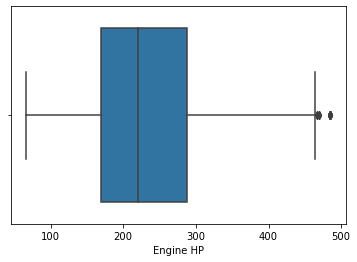

In [50]:
# Outliers After
sns.boxplot(x=df2['Engine HP'])

df2.quantile(0.75)

In [45]:
df.quantile(1)

Year                   2017.0
Engine HP              1001.0
Engine Cylinders         16.0
Number of Doors           4.0
highway MPG             354.0
city mpg                137.0
Popularity             5657.0
MSRP                2065902.0
Name: 1, dtype: float64